MOBILE PRICE CLASSIFICATION ALGORITHIMS USED ARE


*   RANDOM FOREST
*  DECISION TREE

*   SVM













In [ ]:
#Importing all necessary libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
#Reading of csv file
data_2=pd.read_csv("/content/train.csv")
data_2.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [ ]:
data_2.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [ ]:
data_2.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data_2_f = data_2[data_2['sc_w'] != 0] 
data_2_f.shape

(1820, 21)

In [ ]:
data_2_f.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# It represents a correlation matrix
data_2_f.corr()

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.027992     0.002152 -0.046354  0.027197   
blue                0.027992  1.000000     0.019804  0.018615 -0.002205   
clock_speed         0.002152  0.019804     1.000000 -0.007912 -0.005542   
dual_sim           -0.046354  0.018615    -0.007912  1.000000 -0.026517   
fc                  0.027197 -0.002205    -0.005542 -0.026517  1.000000   
four_g              0.018697  0.010622    -0.036898 -0.008137 -0.017656   
int_memory         -0.005402  0.042236     0.004766 -0.018819 -0.031744   
m_dep               0.034002  0.015608    -0.011873 -0.015983 -0.002944   
mobile_wt           0.013024 -0.026841    -0.001622 -0.004086  0.032584   
n_cores            -0.028151  0.031817    -0.014540 -0.017411 -0.021705   
pc                  0.025003 -0.014121    -0.008409 -0.023797  0.645860   
px_height           0.015521 -0.010014    -0.008289 -0.026444 -0.001315   
px_width           -0.003020 -0.047889    -0.002100  0.009845 -0.004016   
ram                -0.005942  0.030894     0.004992  0.048661  0.011890   
sc_h               -0.044839 -0.015406    -0.024721 -0.008412 -0.012276   
sc_w               -0.022328 -0.026305    -0.003689 -0.003627 -0.017634   
talk_time           0.054852  0.016007    -0.023469 -0.029528 -0.018514   
three_g             0.006717 -0.025322    -0.042981 -0.016976 -0.008326   
touch_screen       -0.003490  0.000981     0.030562 -0.013324 -0.018925   
wifi               -0.003430 -0.023289    -0.021580  0.023953  0.006272   
price_range         0.194030  0.028416    -0.004004  0.023006  0.017603   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.018697   -0.005402  0.034002   0.013024 -0.028151  ...   
blue           0.010622    0.042236  0.015608  -0.026841  0.031817  ...   
clock_speed   -0.036898    0.004766 -0.011873  -0.001622 -0.014540  ...   
dual_sim      -0.008137   -0.018819 -0.015983  -0.004086 -0.017411  ...   
fc            -0.017656   -0.031744 -0.002944   0.032584 -0.021705  ...   
four_g         1.000000    0.015415 -0.012938  -0.001657 -0.011529  ...   
int_memory     0.015415    1.000000 -0.006701  -0.024979 -0.029379  ...   
m_dep         -0.012938   -0.006701  1.000000   0.030820 -0.003486  ...   
mobile_wt     -0.001657   -0.024979  0.030820   1.000000 -0.014328  ...   
n_cores       -0.011529   -0.029379 -0.003486  -0.014328  1.000000  ...   
pc            -0.006175   -0.037124  0.027843   0.028544 -0.006193  ...   
px_height     -0.021578    0.006907  0.034623   0.002836  0.000044  ...   
px_width       0.008076   -0.005905  0.034651   0.009330  0.024963  ...   
ram            0.009220    0.037839 -0.011867  -0.000696 -0.014955  ...   
sc_h           0.029355    0.036786 -0.031888  -0.040557 -0.000930  ...   
sc_w           0.032820    0.005704 -0.011339  -0.038432  0.021441  ...   
talk_time     -0.053015   -0.004404  0.019085   0.009199  0.007133  ...   
three_g        0.588862   -0.001372 -0.014938   0.007449 -0.006844  ...   
touch_screen   0.004740   -0.023362  0.006858  -0.011239  0.029548  ...   
wifi          -0.017816    0.012848 -0.027403  -0.004564 -0.020551  ...   
price_range    0.014336    0.051887  0.003064  -0.023872 -0.010310  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.015521 -0.003020 -0.005942 -0.044839 -0.022328   0.054852   
blue           -0.010014 -0.047889  0.030894 -0.015406 -0.026305   0.016007   
clock_speed    -0.008289 -0.002100  0.004992 -0.024721 -0.003689  -0.023469   
dual_sim       -0.026444  0.009845  0.048661 -0.008412 -0.003627  -0.029528   
fc             -0.001315 -0.004016  0.011890 -0.012276 -0.017634  -0.018514   
four_g         -0.021578  0.008076  0.009220  0.029355  0.032820  -0.053015   
int_memory      0.006907 -0.005905  0.037839  0.036786  0.005704  -0.004404   
m_dep           0.034623  0.034651 -0.011867 -0.031888 -0.011339   0.019085   
mo

In [ ]:
data_2_f.describe()

battery_power         blue  clock_speed     dual_sim           fc  \
count    1820.000000  1820.000000  1820.000000  1820.000000  1820.000000   
mean     1237.843956     0.503846     1.519670     0.504396     4.319231   
std       439.940961     0.500123     0.813829     0.500118     4.354894   
min       501.000000     0.000000     0.500000     0.000000     0.000000   
25%       845.500000     0.000000     0.700000     0.000000     1.000000   
50%      1230.500000     1.000000     1.500000     1.000000     3.000000   
75%      1611.000000     1.000000     2.200000     1.000000     7.000000   
max      1998.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1820.000000  1820.000000  1820.000000  1820.000000  1820.000000  ...   
mean      0.524725    32.139560     0.499890   140.585714     4.532967  ...   
std       0.499526    18.114542     0.288805    35.428886     2.289520  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.500000     5.000000  ...   
75%       1.000000    48.000000     0.800000   170.250000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  1820.000000  1820.000000  1820.000000  1820.000000  1820.000000   
mean    646.731319  1252.686264  2133.372527    12.485714     6.337363   
std     444.877537   432.342583  1087.197536     4.166849     4.152062   
min       0.000000   500.000000   256.000000     5.000000     1.000000   
25%     283.750000   877.000000  1203.750000     9.000000     3.000000   
50%     561.500000  1250.000000  2174.000000    13.000000     6.000000   
75%     952.000000  1633.000000  3072.250000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  1820.000000  1820.000000   1820.000000  1820.000000  1820.000000  
mean     11.007143     0.760989      0.507692     0.513187     1.509341  
std       5.455951     0.426597      0.500078     0.499963     1.119285  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     1.000000  
50%      11.000000     1.000000      1.000000     1.000000     2.000000  
75%      16.000000     1.000000      1.000000     1.000000     3.000000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [ ]:
data_2_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1820 non-null   int64  
 1   blue           1820 non-null   int64  
 2   clock_speed    1820 non-null   float64
 3   dual_sim       1820 non-null   int64  
 4   fc             1820 non-null   int64  
 5   four_g         1820 non-null   int64  
 6   int_memory     1820 non-null   int64  
 7   m_dep          1820 non-null   float64
 8   mobile_wt      1820 non-null   int64  
 9   n_cores        1820 non-null   int64  
 10  pc             1820 non-null   int64  
 11  px_height      1820 non-null   int64  
 12  px_width       1820 non-null   int64  
 13  ram            1820 non-null   int64  
 14  sc_h           1820 non-null   int64  
 15  sc_w           1820 non-null   int64  
 16  talk_time      1820 non-null   int64  
 17  three_g        1820 non-null   int64  
 18  touch_sc

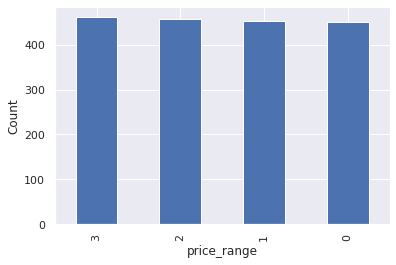

In [ ]:
sns.set()
price_plot=data_2_f['price_range'].value_counts().plot(kind='bar') 
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

In [ ]:
#
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_2_f["battery_power"])
plt.show()

sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_2_f["blue"])
plt.show()

sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_2_f["m_dep"])
plt.show()

sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_2_f["pc"])
plt.show()

sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data_2_f["ram"])
plt.show()



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

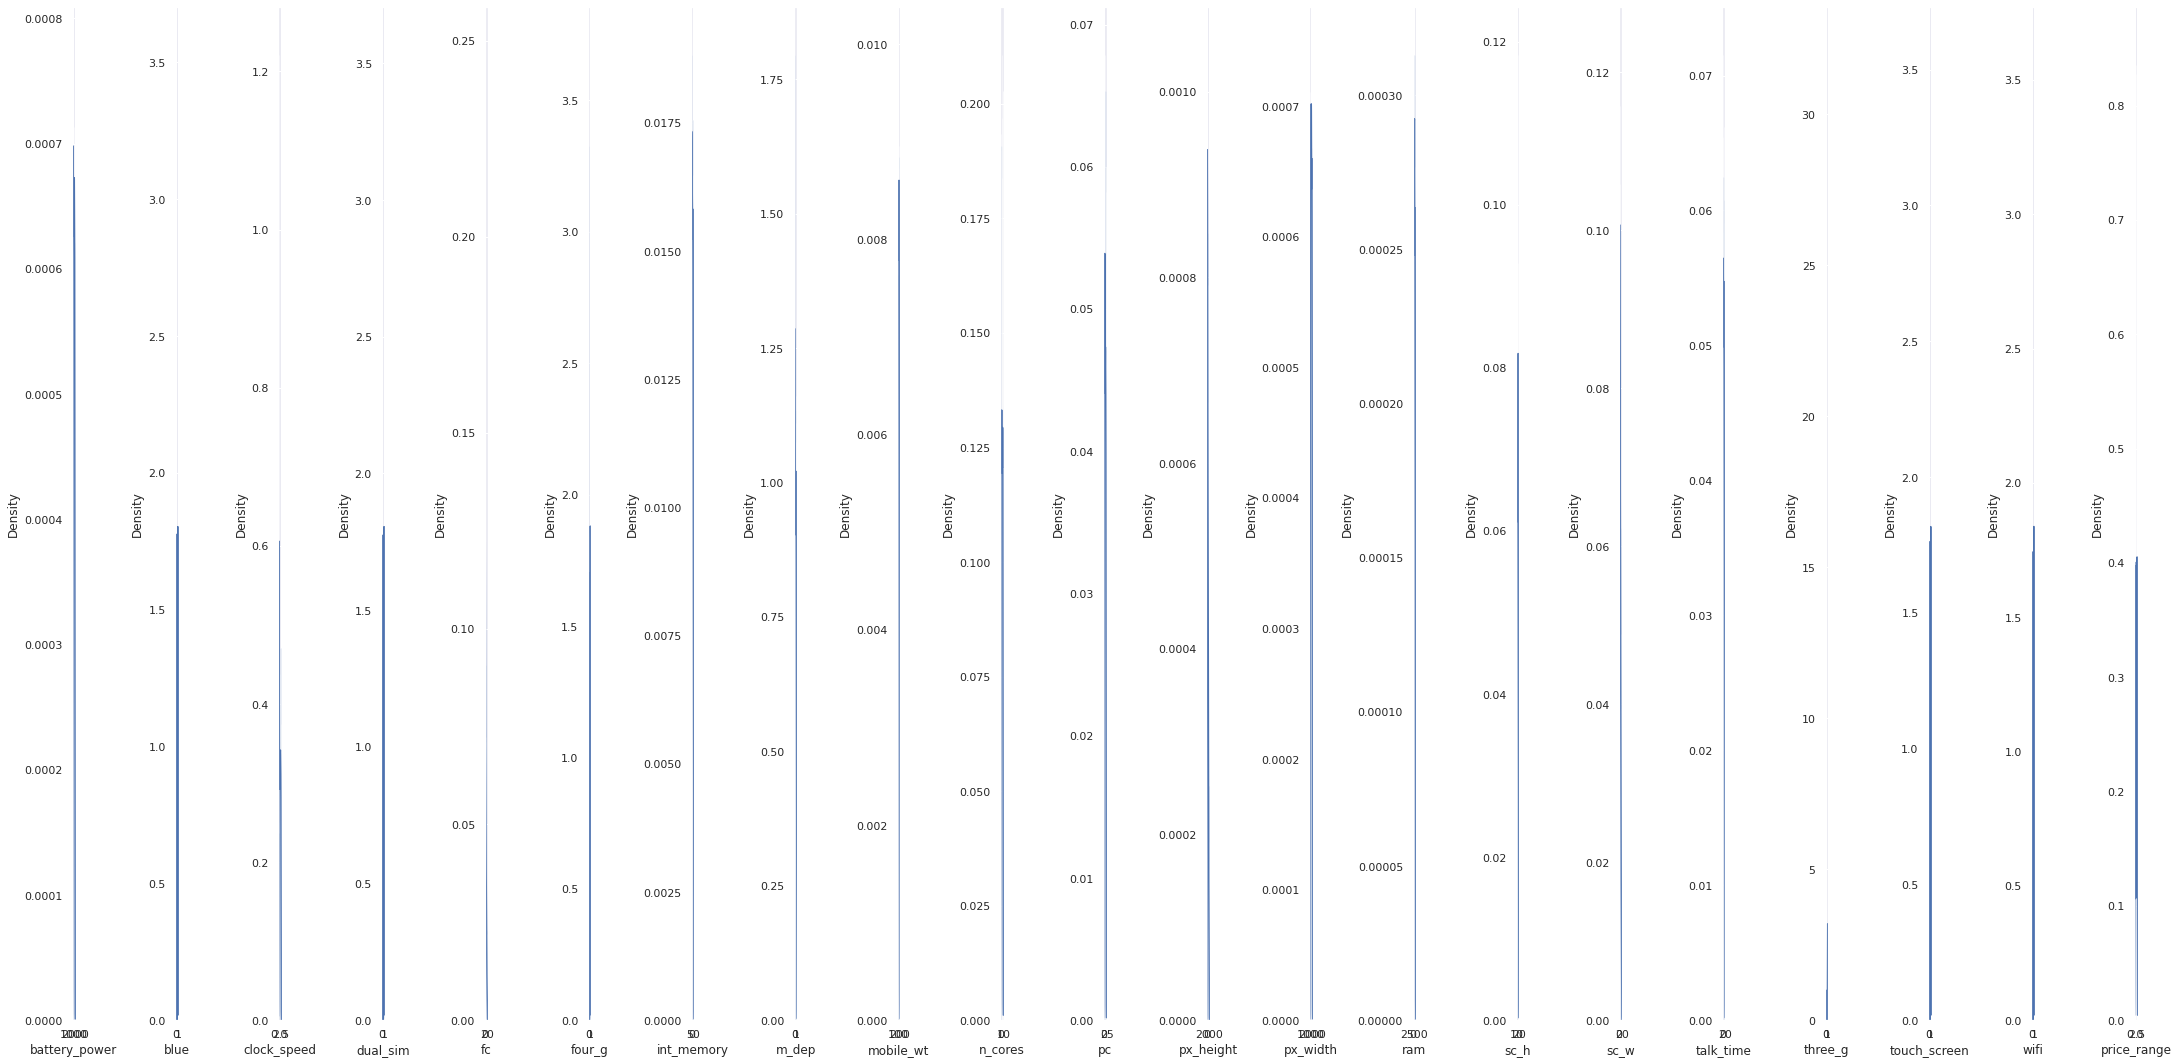

In [ ]:
#distrubutive graphs for all attribute
fig, axes = plt.subplots(ncols=len(data_2_f.columns), figsize=(30,15))
for ax, col in zip(axes, data_2_f.columns):
  sns.distplot(data_2_f[col], ax=ax)
  plt.tight_layout() 
plt.show()


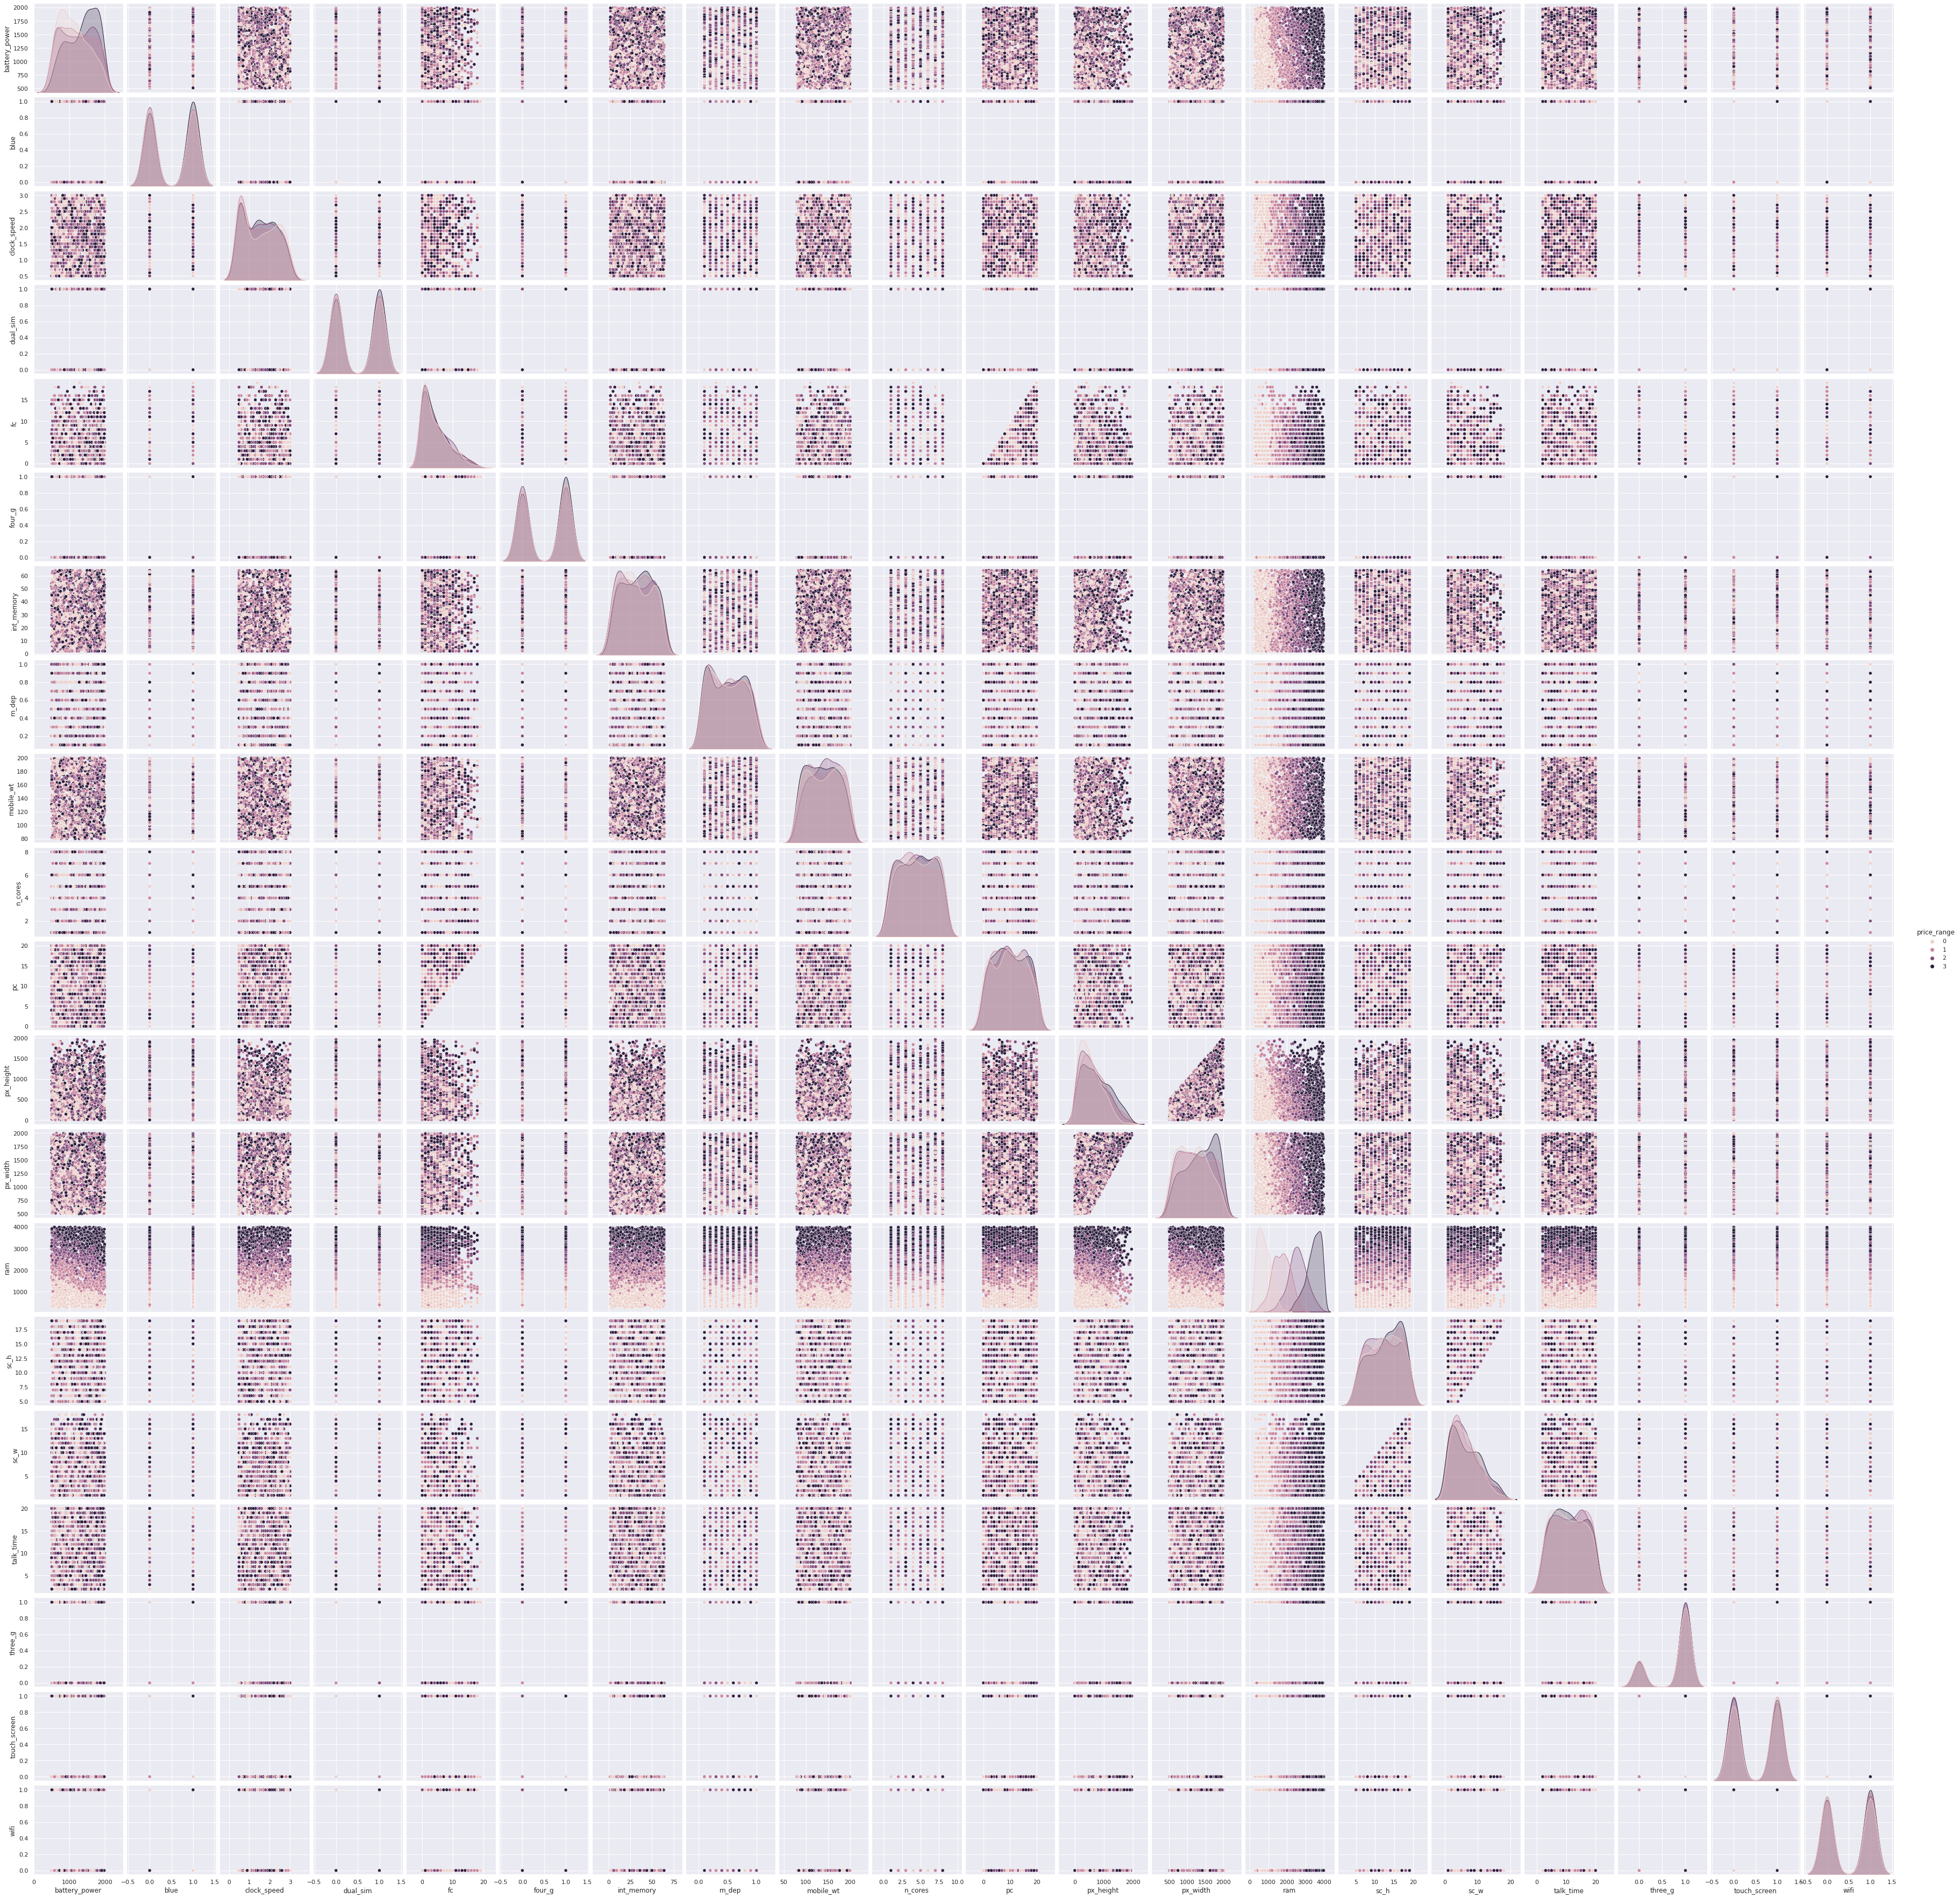

In [ ]:
 #pair plot of the dataset
 sns.pairplot(data_2_f,hue='price_range')

In [ ]:
X=data_2_f.drop(['price_range'], axis=1)
y=data_2_f['price_range']

#missing values
X.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

In [ ]:
# STANDARDASIATION
# import module
from sklearn.preprocessing import StandardScaler
# scale features
scaler = StandardScaler()
model=scaler.fit(X)
X=model.transform(X)

# print scaled features
print(X)

[[-0.90001337 -1.00772212  0.8361912  ... -1.78435088 -1.0155048
   0.97396516]
 [-0.49302877  0.99233705 -1.25327381 ...  0.56042789  0.98473193
  -1.02673077]
 [-1.53436367  0.99233705 -1.25327381 ...  0.56042789  0.98473193
  -1.02673077]
 ...
 [ 1.53052594 -1.00772212 -0.76163498 ...  0.56042789  0.98473193
  -1.02673077]
 [ 0.6233368  -1.00772212 -0.76163498 ...  0.56042789  0.98473193
   0.97396516]
 [-1.65486749  0.99233705  0.59037179 ...  0.56042789  0.98473193
   0.97396516]]


In [ ]:
# import module
#NORMALISATION
from sklearn.preprocessing import MinMaxScaler
# create data
# data = [[11, 2], [3, 7], [0, 10], [11, 8]]
# scale features
scaler = MinMaxScaler()
model=scaler.fit(X)
X=model.transform(X)

# print scaled features
print(X)

[[0.22778891 0.         0.68       ... 0.         0.         1.        ]
 [0.34736139 1.         0.         ... 1.         1.         0.        ]
 [0.04141617 1.         0.         ... 1.         1.         0.        ]
 ...
 [0.94188377 0.         0.16       ... 1.         1.         0.        ]
 [0.6753507  0.         0.16       ... 1.         1.         1.        ]
 [0.00601202 1.         0.6        ... 1.         1.         1.        ]]


In [ ]:
# #train test split of data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=7)
# X_val

In [ ]:
#confusion matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

#   1. Random Forest 

In [ ]:
#building the model

from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()

rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [ ]:
rfc.fit(X_train, y_train)
end = time.time()
n = end - start
ran_time = n
y_pred_rfc=rfc.predict(X_test)
print(ran_time)

1.9489529132843018


In [ ]:
# Make Predictions on the validation dataset Plot accuracy  varying parameters
acc = []
import time
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
acc_time = []
for i in range(10):
  start = time.time()
  clf = RandomForestClassifier(n_estimators=100)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accu = metrics.accuracy_score(y_pred,y_test)*100
  end = time.time()
  dur = end - start
  acc.append(accu)
  acc_time.append(dur)

In [ ]:
acc

[89.83516483516483,
 90.65934065934066,
 90.65934065934066,
 91.20879120879121,
 90.65934065934066,
 89.56043956043956,
 92.58241758241759,
 92.03296703296702,
 90.93406593406593,
 92.03296703296702]

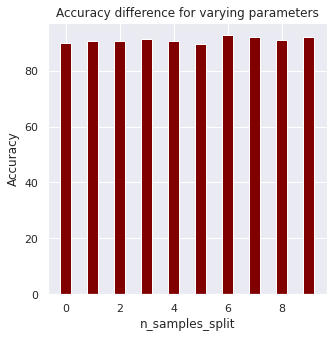

In [ ]:
#t Plot time  for varying parameters
# acc = []
models = []
for i in range(10):
  no = i
  models.append(no)
# models = ["Decision Tree","Random Forest","SVM"]
plt.bar(models, acc, color ='maroon',width = 0.4)

plt.xlabel("n_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy difference for varying parameters")
plt.show()

In [ ]:
acc_time


[0.6541192531585693,
 0.6323211193084717,
 0.4534945487976074,
 0.3631632328033447,
 0.37522077560424805,
 0.3777287006378174,
 0.370441198348999,
 0.3708975315093994,
 0.37142515182495117,
 0.37072229385375977]

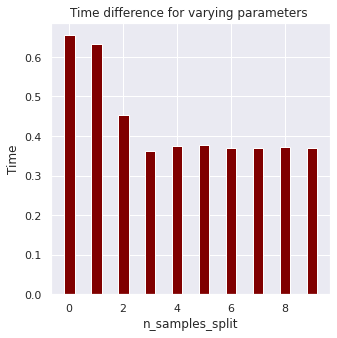

In [ ]:
models = []
for i in range(10):
  no = i
  models.append(no)
# models = ["Decision Tree","Random Forest","SVM"]
plt.bar(models, acc_time, color ='maroon',width = 0.4)

plt.xlabel("n_samples_split")
plt.ylabel("Time")
plt.title("Time difference for varying parameters ")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



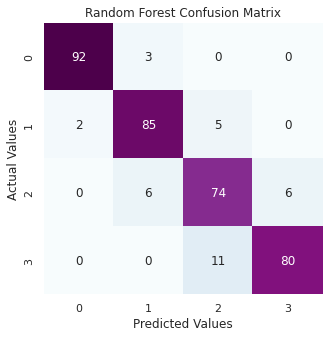

In [ ]:
cm_rfc=my_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

# 2. SVM Classifier

In [ ]:
from sklearn import svm
import time

In [ ]:
start = time.time()
svm_clf = svm.SVC(decision_function_shape='ovo')

In [ ]:
svm_clf.fit(X_train, y_train)
end = time.time()
y_pred_svm=svm_clf.predict(X_test)
t = end - start
svm_time = t
print(svm_time)

0.16449522972106934


In [ ]:
acc_time

[0.6541192531585693,
 0.6323211193084717,
 0.4534945487976074,
 0.3631632328033447,
 0.37522077560424805,
 0.3777287006378174,
 0.370441198348999,
 0.3708975315093994,
 0.37142515182495117,
 0.37072229385375977]

SVM Classifier Accuracy Score:  0.8571428571428571
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        95
           1       0.82      0.79      0.81        92
           2       0.74      0.83      0.78        86
           3       0.94      0.87      0.90        91

    accuracy                           0.86       364
   macro avg       0.86      0.86      0.86       364
weighted avg       0.86      0.86      0.86       364



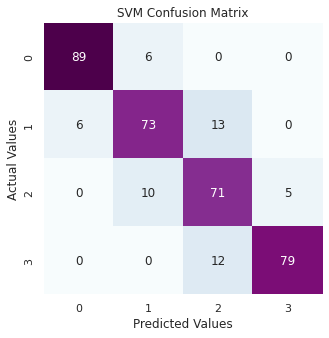

In [ ]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

# 3. Decision Tree Classifier


In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dcc = dtree.predict(X_test)
end = time.time()

In [ ]:
dtree.score(X_train,y_train)

1.0

In [ ]:
dec = end-start
time = dec
time

0.01579761505126953

In [ ]:
# Make Predictions on the validation dataset Plot accuracy  varying parameters
acc_2 = []
import time
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier
acc_time_2 = []
for i in range(10):
  start = time.time()
  clf = DecisionTreeClassifier(min_samples_split=2)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accu = metrics.accuracy_score(y_pred,y_test)*100
  end = time.time()
  dur = end - start
  acc_2.append(accu)
  acc_time_2.append(dur)

In [ ]:
acc_2

[83.51648351648352,
 83.24175824175825,
 84.06593406593407,
 84.06593406593407,
 83.24175824175825,
 83.24175824175825,
 83.51648351648352,
 84.34065934065934,
 85.43956043956044,
 83.24175824175825]

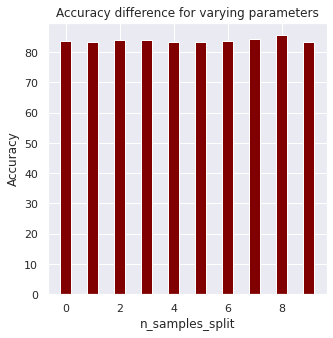

In [ ]:
#t Plot time  for varying parameters
# acc = []
models = []
for i in range(10):
  no = i
  models.append(no)
# models = ["Decision Tree","Random Forest","SVM"]
plt.bar(models, acc_2, color ='maroon',width = 0.4)

plt.xlabel("n_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy difference for varying parameters")
plt.show()

In [ ]:
acc_time_2

[0.01798391342163086,
 0.011837005615234375,
 0.01307225227355957,
 0.013035774230957031,
 0.011516571044921875,
 0.01173853874206543,
 0.011924028396606445,
 0.01167440414428711,
 0.01165914535522461,
 0.011585474014282227]

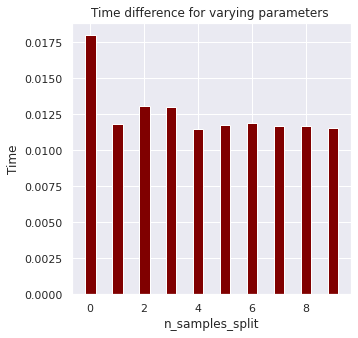

In [ ]:
models = []
for i in range(10):
  no = i
  models.append(no)
# models = ["Decision Tree","Random Forest","SVM"]
plt.bar(models, acc_time_2, color ='maroon',width = 0.4)

plt.xlabel("n_samples_split")
plt.ylabel("Time")
plt.title("Time difference for varying parameters ")
plt.show()

In [ ]:

# # dtree.score(y_test,pred)
# print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93        95
           1       0.80      0.80      0.80        92
           2       0.71      0.76      0.73        86
           3       0.88      0.84      0.86        91

    accuracy                           0.83       364
   macro avg       0.83      0.83      0.83       364
weighted avg       0.84      0.83      0.83       364



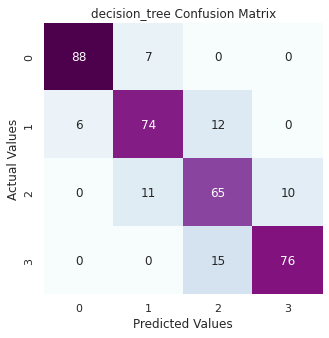

In [ ]:
pred = dtree.predict(X_test)
cm_rfc=my_confusion_matrix(y_test, pred, 'decision_tree Confusion Matrix')

In [ ]:
# accuracy score for all the all classification models
Random=accuracy_score(y_test,y_pred_rfc)
DT=accuracy_score(y_test,y_pred_dcc)
svm=accuracy_score(y_test,y_pred_svm)

In [ ]:
acc_dict={"SVM":svm,"Decision Tree":DT,"Randomforest":Random}

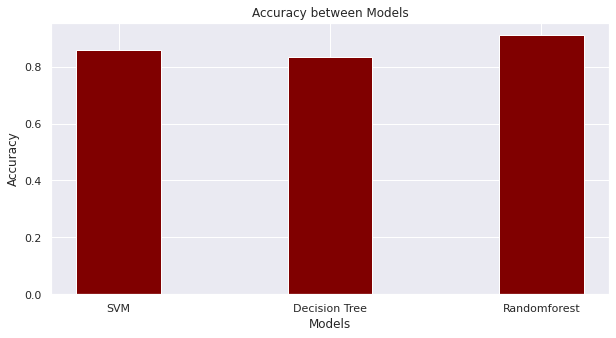

In [ ]:
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(models, accuracy, color ='maroon',width = 0.4)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy between Models")
plt.show()

In [ ]:
 #k fold  cross validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
P=cross_val_score(SVC(),X,y)
Q=cross_val_score(DecisionTreeClassifier(),X,y)
R=cross_val_score(RandomForestClassifier(),X,y)
print(P)
print(R)
print(Q)

[0.8489011  0.83241758 0.88736264 0.83241758 0.83241758]
[0.87087912 0.88186813 0.87637363 0.85989011 0.86263736]
[0.82967033 0.81318681 0.83516484 0.82417582 0.82692308]
